<a href="https://colab.research.google.com/github/lucianosilvacraam/astro/blob/master/Astroinform%C3%A1tica_II_Aula_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASTROINFORMÁTICA II - AULA 08**

Equações de campo: https://en.wikipedia.org/wiki/Mathematics_of_general_relativity

Solução de Schwarzchild (sem rotação e sem carga): 

https://nbviewer.jupyter.org/github/sagemanifolds/SageManifolds/blob/master/Worksheets/v1.3/SM_Schwarzschild.ipynb

https://nbviewer.jupyter.org/github/sagemanifolds/SageManifolds/blob/master/Worksheets/v1.3/SM_Schwarzschild_geod.ipynb

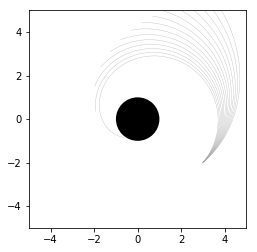

In [0]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.integrate as spi
%matplotlib inline

c = 1.0  # Canonical coordinates
rs = 1.0 # Star ratio

def metric(y,s):
    #Spacetime metric
    return np.array([
    y[4], y[5], y[6], y[7],
    rs*0.5/y[0]/(y[0]-rs)*y[4]**2 + (y[0]-rs)*y[5]**2 + (y[0]-rs)*np.sin(y[1])**2*y[6]**2 + c*c*rs*(rs-y[0])*0.5/y[0]**3*y[7]**2,
    -2.0/y[0]*y[4]*y[5] + np.sin(y[1])*np.cos(y[1])*y[6]**2,
    -2.0/y[0]*y[4]*y[6] - 2.0/np.tan(y[1])*y[5]*y[6],
    rs/y[0]/(rs-y[0])*y[4]*y[7]
    ])

    # Integrate
    y = spi.odeint(metric, y0, s )

fig = pl.figure(1)

for y0 in np.linspace(0.3,0.21,15):
    
      # Initial conditions
    x0r = np.array([ 3.0, -2.0, 0.0])
    x0rd= np.array([ y0, 0.25, 0.0])

      # Convert the initial position to spherical coordinates
    x0 = np.zeros(3)
    x0[0] = np.sqrt(x0r[0]**2+x0r[1]**2+x0r[2]**2)
    x0[1] = np.arccos(x0r[2]/x0[0])
    x0[2] = np.arctan2(x0r[1],x0r[0])

      # Convert the initial velocity to spherical coordinates
    x0d = np.array([
     np.cos(x0[2])*np.sin(x0[1])      *x0rd[0] + np.sin(x0[2])*np.sin(x0[1])      *x0rd[1] + np.cos(x0[1])      *x0rd[2],
     np.cos(x0[2])*np.cos(x0[1])/x0[0]*x0rd[0] + np.sin(x0[2])*np.cos(x0[1])/x0[0]*x0rd[1] - np.sin(x0[1])/x0[0]*x0rd[2],
    -np.sin(x0[2])/np.sin(x0[1])/x0[0]*x0rd[0] + np.cos(x0[2])/np.sin(x0[1])/x0[0]*x0rd[1]
    ])

      # Pack the initial conditions into an array
    y0 = np.array([  x0[0],  x0[1],  x0[2], 0.0, x0d[0], x0d[1], x0d[2], 1.0 ])

      # Parameterized time intervals
    s = np.linspace(0,30,10000)

      # Integrate
    y = spi.odeint(metric, y0, s )

      # Unpack the results
    r = y[:,0]
    theta = y[:,1]
    phi = y[:,2]
    t = y[:,3]

      # Plot in the equatorial plane
    pl.plot(r*np.cos(phi),r*np.sin(phi),color="#aaaaaa",linewidth=0.3)


ax = pl.gca()
ax.add_patch( pl.Circle((0,0), radius=rs, fc=[0,0,0]))
pl.axis([-5,5,-5,5])
ax.set_aspect(1)
pl.show()